<a href="https://colab.research.google.com/github/Suryaprakash17/letsupgrade-DS-advance/blob/main/titanic_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import plotly.express as px

In [5]:
train_data = pd.read_csv('https://raw.githubusercontent.com/ingledarshan/Data-Science-Advanced-Datasets/main/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
 test_data = pd.read_csv('https://raw.githubusercontent.com/ingledarshan/Data-Science-Advanced-Datasets/main/test.csv')
 test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
final_data=pd.concat([train_data,test_data])
print(final_data.shape)
final_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
final_data.isna().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       529
             True      False   False  False  False  False  False  False   False  True   False       244
             False     False   False  False  False  False  False  False   False  False  False       183
                                             True   False  False  False   False  True   False       158
             True      False   False  False  False  False  False  False   False  False  False        87
                                             True   False  False  False   False  True   False        82
             False     False   False  False  True   False  False  False   False  False  False        19
             True      False   False  False  True   False  False  False   False  False  False         4
             False     False   False  False  False  False  False  False

Text(0.5, 1.0, 'COUNTPLOT')

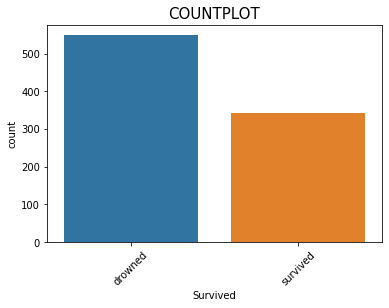

In [9]:
sns.countplot(x='Survived',data=final_data)
plt.xticks(np.arange(2),['drowned','survived'],rotation=45)
plt.title('COUNTPLOT',fontsize=15)

In [10]:
train_NA=train_data.isna().sum()
test_NA=test_data.isna().sum()
final_NA=final_data.isna().sum()

pd.concat([train_NA,test_NA,final_NA], axis=1, sort = False, keys=['Train NA','Test NA','Final NA'])

,Train NA,Test NA,Final NA
PassengerId,0,0.0,0
Survived,0,NaN,418
Pclass,0,0.0,0
Name,0,0.0,0
Sex,0,0.0,0
Age,177,86.0,263
SibSp,0,0.0,0
Parch,0,0.0,0
Ticket,0,0.0,0
Fare,0,1.0,1


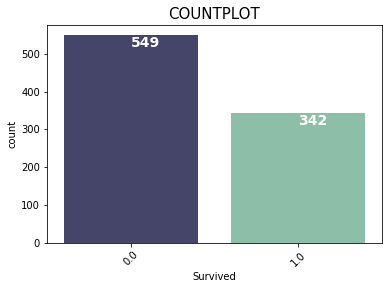

In [11]:
sns.countplot(x='Survived',data=final_data)
plt.xticks(np.arange(2),['drowned','survived'],rotation=45)
plt.title('COUNTPLOT',fontsize=15)
x = sns.countplot(x = 'Survived', data = final_data, palette=["#3f3e6fd1", "#85c6a9"])
labels = (final_data['Survived'].value_counts())
for i,v in enumerate(labels):
    x.text(i, v-20, str(v), verticalalignment='center', size=14, color='w', fontweight='bold')
plt.show();

In [12]:
final_data['Sex'].value_counts(normalize = True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [13]:
age_wise=final_data[final_data['Age']>18]
age_wise.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


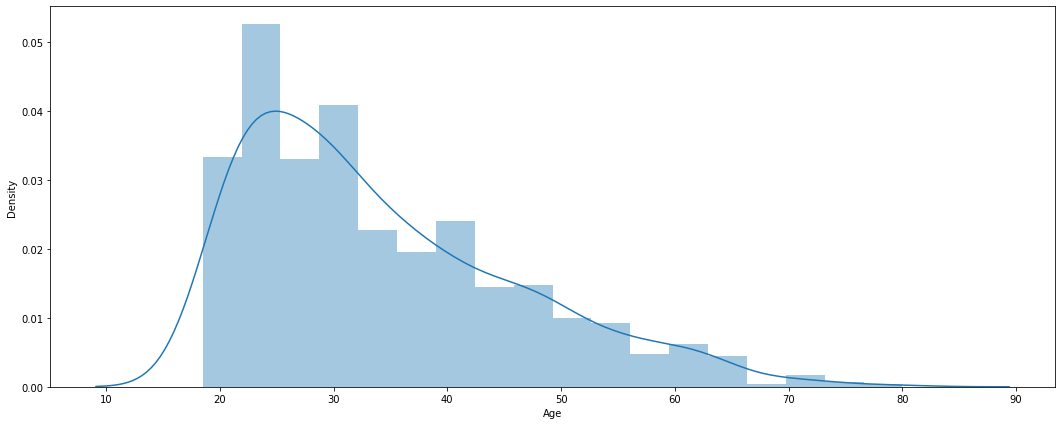

In [14]:
plt.figure(figsize=(18,7))
sns.distplot(age_wise['Age'])

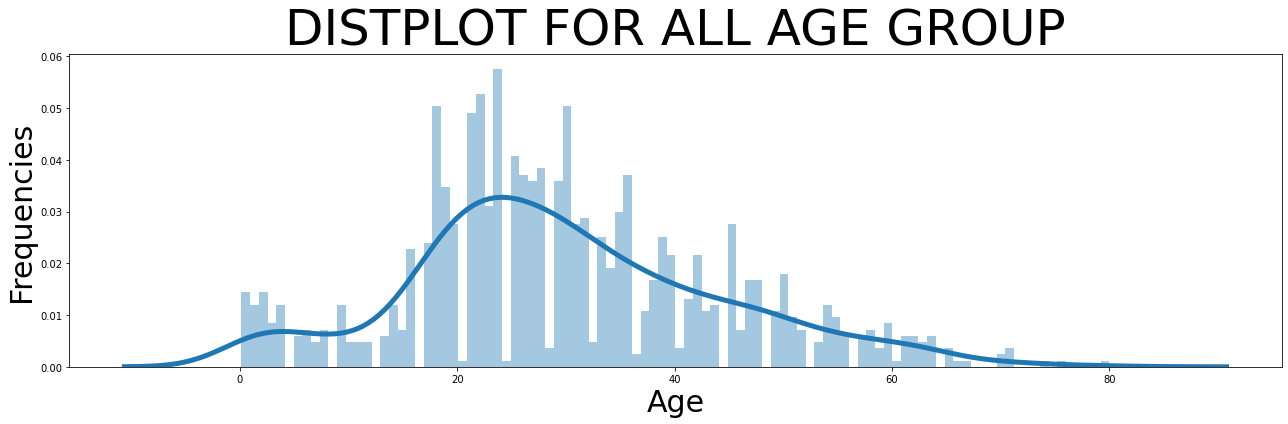

In [15]:
plt.figure(figsize=(18,6))
sns.distplot(final_data['Age'],kde_kws={'lw':5}, bins=100)
plt.xlabel('Age',fontsize=30)
plt.ylabel('Frequencies',fontsize=30)
plt.title('DISTPLOT FOR ALL AGE GROUP',fontsize=50)
plt.tight_layout()

In [16]:
df=pd.DataFrame(final_data['Fare'].describe())
df.transpose()

,count,mean,std,min,25%,50%,75%,max
Fare,1308.0,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292


In [17]:
only_male=age_wise[age_wise['Sex']=='male']
only_male.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,13,0.0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S


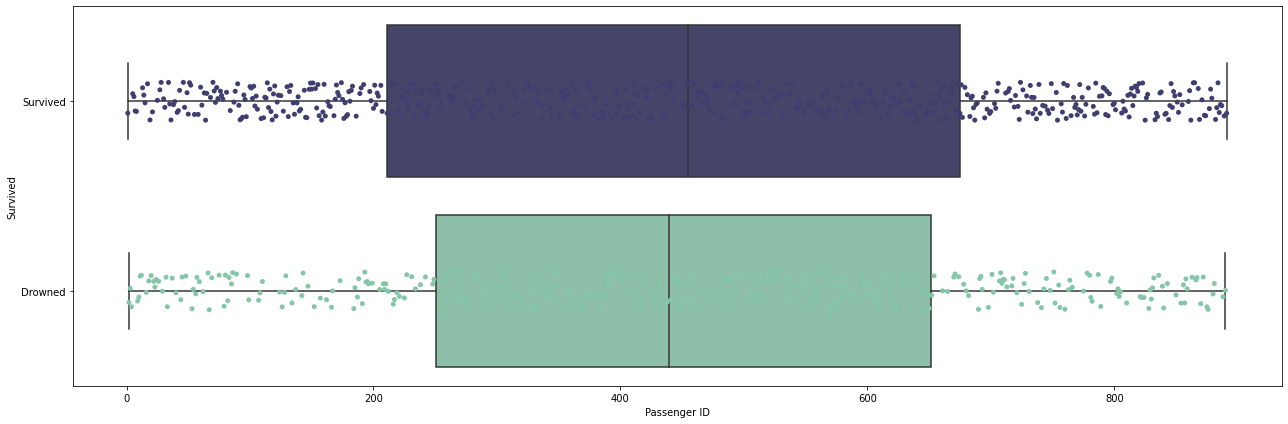

In [18]:
plt.figure(figsize=(18,6))
sns.boxplot(x='PassengerId',y='Survived',data=final_data,
              palette=["#3f3e6fd1", "#85c6a9"],fliersize=0, orient = 'h')
sns.stripplot(x='PassengerId',y='Survived',data=final_data,
              palette=["#3f3e6fd1", "#85c6a9"], orient = 'h') 
plt.yticks(np.arange(2),['Survived','Drowned'])
plt.xlabel('Passenger ID')
plt.tight_layout()

In [19]:
pd.DataFrame(final_data.groupby('Sex')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,388.0,28.687088,14.576962,0.17,19.0,27.0,38.0,76.0
male,658.0,30.585228,14.280581,0.33,21.0,28.0,39.0,80.0


In [20]:
final_data[final_data['Age']==max(final_data['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [21]:
(final_data['Age']==18).sum()

39

In [22]:
pd.DataFrame(final_data.groupby('Pclass')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,284.0,39.159930,14.548028,0.92,28.0,39.0,50.0,80.0
2,261.0,29.506705,13.638627,0.67,22.0,29.0,36.0,70.0
3,501.0,24.816367,11.958202,0.17,18.0,24.0,32.0,74.0


In [23]:
final_data[ (final_data['Age']>0) & (final_data['Pclass']==1) ].shape

(284, 12)

In [24]:
final_data[(final_data["Age"]>0) & (final_data['Pclass']==2)].shape

(261, 12)

In [25]:
final_data[(final_data["Age"]>0) & (final_data['Pclass']==3)].shape

(501, 12)

In [26]:
284+261+501

1046

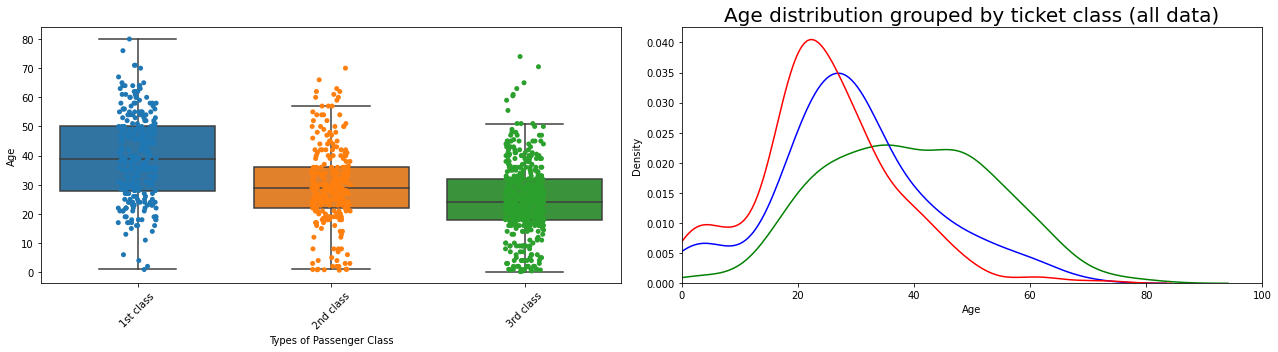

In [27]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.boxplot(x='Pclass',y='Age',data=final_data,fliersize=0)
sns.stripplot(x='Pclass',y='Age',data=final_data)
plt.xticks(np.arange(3),['1st class','2nd class','3rd class'],rotation=45)
plt.xlabel('Types of Passenger Class')

plt.subplot(1,2,2)
age_1_class = final_data[ (final_data['Age']>0) & (final_data['Pclass'] == 1)]
age_2_class = final_data[ (final_data['Age']>0) & (final_data['Pclass'] == 2)]
age_3_class = final_data[ (final_data['Age']>0) & (final_data['Pclass'] == 3)]

sns.kdeplot(age_1_class["Age"], shade=False, color='g', label = '1st class')
sns.kdeplot(age_2_class["Age"], shade=False,  color='b', label = '2nd class')
sns.kdeplot(age_3_class["Age"], shade=False,color='r', label = '3rd class')
plt.title('Age distribution grouped by ticket class (all data)',fontsize= 20)
plt.xlabel('Age')
plt.xlim(0, 100)
plt.tight_layout()
plt.show();

In [28]:
(final_data['Age']==11).sum()

4

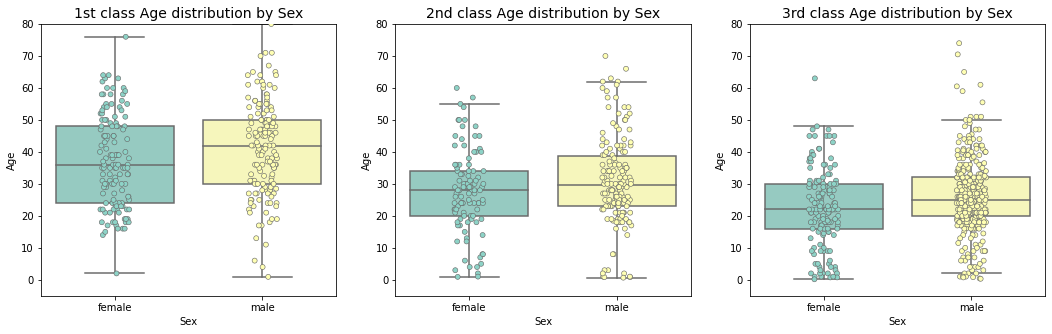

In [29]:
plt.figure(figsize=(18, 5))
palette = "Set3"

plt.subplot(1, 3, 1)
sns.boxplot(x = 'Sex', y = 'Age', data = age_1_class,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_1_class,
     linewidth = 0.6, palette = palette)
plt.title('1st class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 2)
sns.boxplot(x = 'Sex', y = 'Age', data = age_2_class,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_2_class,
     linewidth = 0.6, palette = palette)
plt.title('2nd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 3)
sns.boxplot(x = 'Sex', y = 'Age',  data = age_3_class,
     order = ['female', 'male'], palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_3_class,
     order = ['female', 'male'], linewidth = 0.6, palette = palette)
plt.title('3rd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.show();

In [34]:
age_1_class_stat = pd.DataFrame(age_1_class.groupby('Sex')['Age'].describe())
age_2_class_stat = pd.DataFrame(age_2_class.groupby('Sex')['Age'].describe())
age_3_class_stat = pd.DataFrame(age_3_class.groupby('Sex')['Age'].describe())


pd.concat([age_1_class_stat, age_2_class_stat, age_3_class_stat], axis=0, keys = ['1st', '2nd', '3rd'])

count       mean        std   min   25%   50%    75%   max
    Sex                                                               
1st female  133.0  37.037594  14.272460  2.00  24.0  36.0  48.00  76.0
    male    151.0  41.029272  14.578529  0.92  30.0  42.0  50.00  80.0
2nd female  103.0  27.499223  12.911747  0.92  20.0  28.0  34.00  60.0
    male    158.0  30.815380  13.977400  0.67  23.0  29.5  38.75  70.0
3rd female  152.0  22.185329  12.205254  0.17  16.0  22.0  30.00  63.0
    male    349.0  25.962264  11.682415  0.33  20.0  25.0  32.00  74.0

In [49]:
final_data['Name'][1].iloc[0]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [44]:
final_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [46]:
x = final_data['Name'][1].iloc[0].split(',')
x

['Cumings', ' Mrs. John Bradley (Florence Briggs Thayer)']

In [39]:
x1 = x[1].split('.')
x1

[' Mrs', ' John Bradley (Florence Briggs Thayer)']

In [40]:
x2 = x1[0].strip(" ")
x2

'Mrs'

In [41]:
final_data['Title'] = final_data['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')
final_data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Jonkheer          1
Capt              1
Mme               1
Dona              1
Lady              1
Don               1
Sir               1
the Countess      1
Name: Title, dtype: int64

In [42]:
s=final_data['Title'].value_counts()
s

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Jonkheer          1
Capt              1
Mme               1
Dona              1
Lady              1
Don               1
Sir               1
the Countess      1
Name: Title, dtype: int64

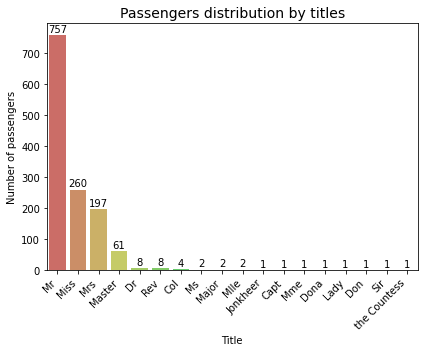

In [43]:
plt.figure(figsize=(6, 5))
ax = sns.countplot( x = 'Title', data = final_data, palette = "hls", order = s.index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Passengers distribution by titles',fontsize= 14)
plt.ylabel('Number of passengers')
labels = (s)
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
plt.tight_layout()
plt.show();

In [53]:
final_data[final_data['Title']=='Mr'][:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
12,13,0.0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr


In [55]:
title_dict = {  'Mr':     'Mr',
                'Mrs':    'Mrs',
                'Miss':   'Miss',
                'Master': 'Master',
              
                'Ms':     'Miss',
                'Mme':    'Mrs',
                'Mlle':   'Miss',

                'Capt':   'military',
                'Col':    'military',
                'Major':  'military',

                'Dr':     'Dr',
                'Rev':    'Rev',
                  
                'Sir':    'honor',
                'the Countess': 'honor',
                'Lady':   'honor',
                'Jonkheer': 'honor',
                'Don':    'honor',
                'Dona':   'honor' }

final_data['Title_category'] = final_data['Title'].map(title_dict)

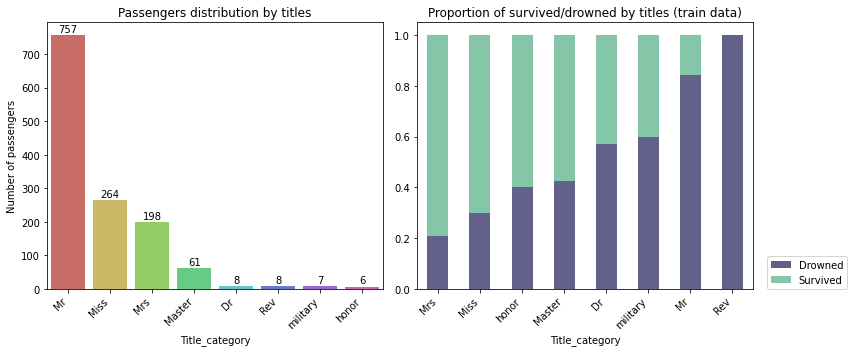

In [59]:
fig = plt.figure(figsize=(12, 5))


ax1 = fig.add_subplot(121)
ax = sns.countplot(x = 'Title_category', data = final_data, palette = "hls", order = 
                   final_data['Title_category'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Passengers distribution by titles',fontsize= 12)
plt.ylabel('Number of passengers')


labels = (final_data['Title_category'].value_counts())
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()

ax2 = fig.add_subplot(122)
surv_by_title_cat = final_data.groupby('Title_category')['Survived'].value_counts(normalize = True).unstack()
surv_by_title_cat = surv_by_title_cat.sort_values(by=1, ascending = False)
surv_by_title_cat.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)

plt.legend( ( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)


plt.title('Proportion of survived/drowned by titles (train data)',fontsize= 12)

plt.tight_layout()
plt.show()

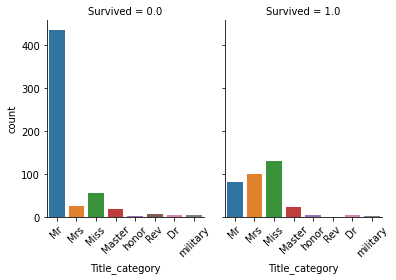

In [65]:
category_survived = sns.catplot(x='Title_category', col='Survived', data=final_data, height=4, aspect=0.7, kind='count')
category_survived.set_xticklabels(rotation=45)
plt.tight_layout();

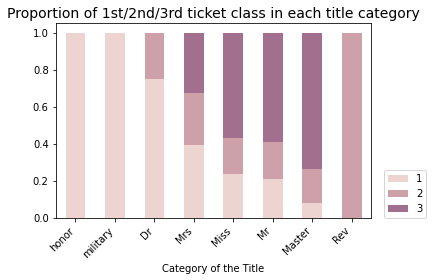

In [66]:
class_by_title_cat = final_data.groupby('Title_category')['Pclass'].value_counts(normalize = True)
class_by_title_cat = class_by_title_cat.unstack().sort_values(by = 1, ascending = False)
class_by_title_cat.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'])
plt.legend(loc=(1.04,0))
_ = plt.xticks(
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light'  
)
plt.title('Proportion of 1st/2nd/3rd ticket class in each title category',fontsize= 14)
plt.xlabel('Category of the Title')
plt.tight_layout()

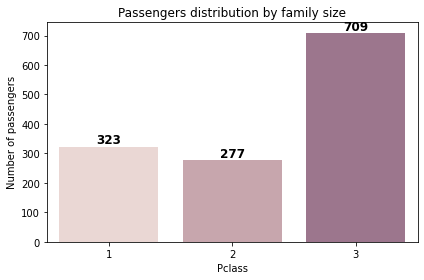

In [68]:
ax = sns.countplot(final_data['Pclass'], palette = ['#eed4d0', '#cda0aa', '#a2708e'])

labels = (final_data['Pclass'].value_counts(sort = False))

for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')
plt.tight_layout()

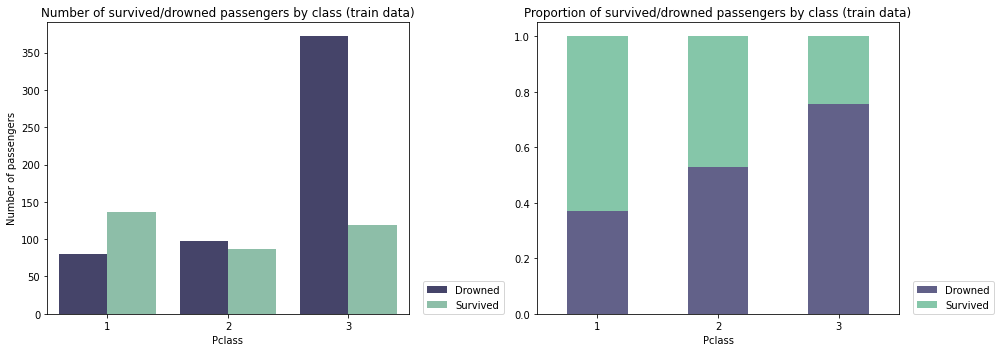

In [69]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)
sns.countplot(x = 'Pclass', hue = 'Survived', data = final_data, palette=["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Number of survived/drowned passengers by class (train data)')
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
__= plt.xticks(rotation=False)

ax2 = fig.add_subplot(122)
d = final_data.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax2, color =["#3f3e6fd1", "#85c6a9"])
plt.title('Proportion of survived/drowned passengers by class (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
__= plt.xticks(rotation=False)

plt.tight_layout()

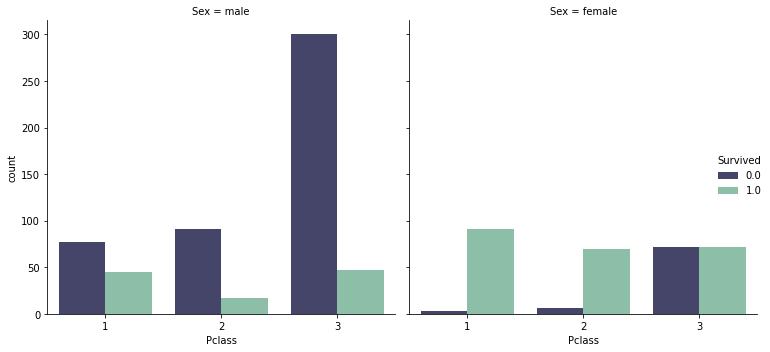

In [73]:
sns.catplot(x = 'Pclass',hue = 'Survived',col = 'Sex',kind = 'count',data = final_data,palette=["#3f3e6fd1", "#85c6a9"])
plt.tight_layout()

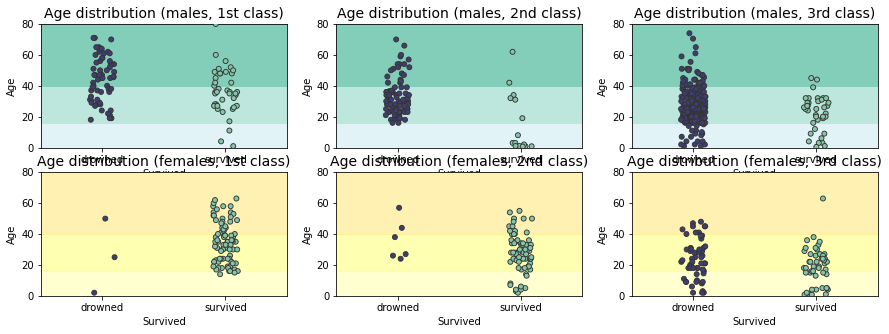

In [76]:
plt.figure(figsize=(15, 5))
palette=["#3f3e6fd1", "#85c6a9"]

plt.subplot(2, 3, 1)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='male'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 1st class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='male'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 2nd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 3)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='male'],
              linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 3rd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.subplot(2, 3, 4)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='female'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 1st class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='female'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 2nd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 6)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='female'],
              linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 3rd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)
plt.show()

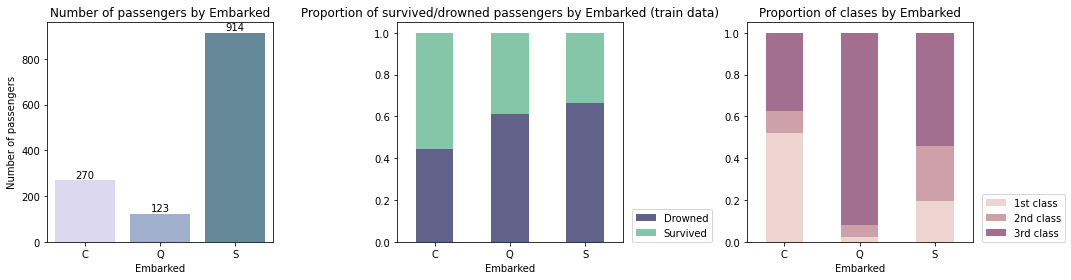

In [81]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
palette = sns.cubehelix_palette(5, start = 2)
ax = sns.countplot(final_data['Embarked'], palette = palette, order = ['C', 'Q', 'S'], ax = ax1)
plt.title('Number of passengers by Embarked')
plt.ylabel('Number of passengers')

labels = (final_data['Embarked'].value_counts())
labels = labels.sort_index()

for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
ax2 = fig.add_subplot(132)
surv_by_emb = final_data.groupby('Embarked')['Survived'].value_counts(normalize = True)
surv_by_emb = surv_by_emb.unstack().sort_index()
surv_by_emb.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('Proportion of survived/drowned passengers by Embarked (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
__= plt.xticks(rotation=False)


ax3 = fig.add_subplot(133)
class_by_emb = final_data.groupby('Embarked')['Pclass'].value_counts(normalize = True)
class_by_emb = class_by_emb.unstack().sort_index()
class_by_emb.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax3)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of clases by Embarked')
__= plt.xticks(rotation=False)

plt.tight_layout();

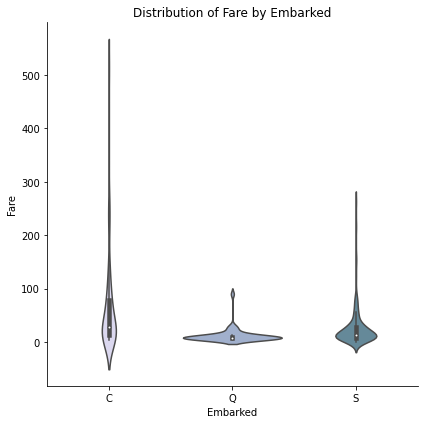

In [83]:
sns.catplot(x="Embarked", y="Fare", kind="violin",
            data=final_data, height = 6, palette = palette, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

In [84]:
pd.DataFrame(final_data.groupby('Embarked')['Fare'].describe())

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,270.0,62.336267,84.185996,4.0125,13.8583,28.51875,78.966675,512.3292
Q,123.0,12.409012,13.616133,6.7500,7.7500,7.75000,10.197900,90.0000
S,913.0,27.418824,37.096402,0.0000,8.0500,13.00000,27.750000,263.0000


In [85]:
train_data[train_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


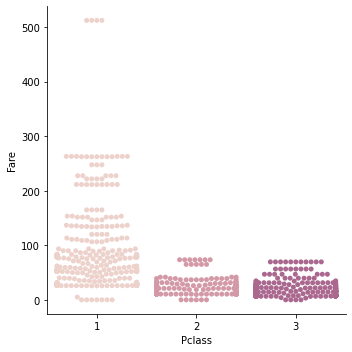

In [88]:
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=final_data, palette=sns.cubehelix_palette(5, start = 3), height = 5)
plt.tight_layout()

In [91]:
final_data[final_data['Fare'] == max(final_data['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,Miss
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,Mr
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,Mr
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs,Mrs
